In [18]:
import pandas as pd

Ob 1 : Fillltrer les données de telle sorte qu'on ait uniquement les les batiments non residential

In [19]:
df1 = pd.read_csv('2015-building-energy-benchmarking.csv')

In [20]:
pd.set_option('display.max_row', df1.shape[0])
pd.set_option('display.max_column', df1.shape[1])

In [21]:
df1.head(3)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081


In [22]:
df1.dtypes

OSEBuildingID                                                      int64
DataYear                                                           int64
BuildingType                                                      object
PrimaryPropertyType                                               object
PropertyName                                                      object
TaxParcelIdentificationNumber                                     object
Location                                                          object
CouncilDistrictCode                                                int64
Neighborhood                                                      object
YearBuilt                                                          int64
NumberofBuildings                                                  int64
NumberofFloors                                                   float64
PropertyGFATotal                                                   int64
PropertyGFAParking                                 

In [23]:
df1[df1['BuildingType'] == 'NonResidential'].shape

(1461, 47)

In [26]:
df1 = df1[df1['BuildingType'] == 'NonResidential']

In [27]:
df1.shape

(1461, 47)

Nous voila notre premier filtre réalisé

On va maintenant proceder à élimination des variables qui nous avanceraient pas dans notre travail

In [29]:
df1 = df1.drop(columns=['OSEBuildingID', 'DataYear', 'PropertyName', 'Location', 'CouncilDistrictCode', 'NumberofBuildings', 'TaxParcelIdentificationNumber',
                        'ListOfAllPropertyUseTypes','YearsENERGYSTARCertified', 'Comment', 'Outlier', 'City Council Districts', 'OtherFuelUse(kBtu)',
                        'Seattle Police Department Micro Community Policing Plan Areas', '2010 Census Tracts', 'Zip Codes', 'SPD Beats'])

In [32]:
#df1.shape

In [30]:
# Filtrons nos données pour ne garder que celles utilisables
df1 = df1[df1.columns[df1.isna().mean()<=0.5]]
df1.shape

(1461, 28)

In [37]:
df2 = pd.read_csv('2016-building-energy-benchmarking.csv')

In [38]:
df2.shape

(3376, 46)

In [39]:
df2 = df2[df2['BuildingType'] == 'NonResidential']
df2.shape

(1460, 46)

In [40]:
df2 = df2.drop(columns=['OSEBuildingID', 'DataYear', 'PropertyName', 'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber', 
                  'CouncilDistrictCode', 'Latitude', 'Longitude', 'NumberofBuildings', 'ListOfAllPropertyUseTypes', 
                  'YearsENERGYSTARCertified', 'Comments', 'Outlier'])
df2.shape

(1460, 30)

In [41]:
df2 = df2[df2.columns[df2.isna().mean() <= 0.5]]

df2.shape

(1460, 28)

In [43]:
len(set(df1.columns.to_list() + df2.columns.to_list()))

30

In [44]:
[print(x) for x in df1.columns if x not in df2.columns]

GHGEmissions(MetricTonsCO2e)
GHGEmissionsIntensity(kgCO2e/ft2)


[None, None]

In [45]:
[print(x) for x in df2.columns if x not in df1.columns]

TotalGHGEmissions
GHGEmissionsIntensity


[None, None]

In [46]:
df1.columns

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'YearBuilt',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ENERGYSTARScore',
       'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)',
       'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', 'ComplianceStatus'],
      dtype='object')

In [48]:
df1 = df1.drop(columns=['SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA'])

In [49]:
df1.columns = ['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'YearBuilt',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'DefaultData', 'ComplianceStatus']

In [50]:
df2 = df2.drop(columns=['SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA'])
df2.columns = ['BuildingType', 'PrimaryPropertyType', 'Neighborhood', 'YearBuilt',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus',
       'TotalGHGEmissions', 'GHGEmissionsIntensity']

In [51]:
[print(x) for x in df2.columns if x not in df1.columns]


[]

In [52]:
[print(x) for x in df1.columns if x not in df2.columns]

[]

In [53]:
len(set(df1.columns.to_list() + df2.columns.to_list()))

26

In [152]:
df3 = pd.merge(df1, df2, how='outer')

In [153]:
df3.shape

(2921, 26)

Après filtrage de nos données passons à présent au traitement des valeurs manquantes

In [56]:
from sklearn.impute import SimpleImputer
import numpy as np

In [154]:
df_impt_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

# Fit imputer to data to retrieve central measure:
df_impt_mean.fit(df3['ENERGYSTARScore'].values.reshape(-1, 1))

# Transforming missing data points to mean value:
df3['ENERGYSTARScore'] = df_impt_mean.transform(df3['ENERGYSTARScore'].values.reshape(-1, 1))

In [155]:
df3['ENERGYSTARScore'].values

array([65.        , 51.        , 18.        , ..., 63.15936255,
       77.        , 63.15936255])

In [156]:
df3 = df3.dropna()

In [104]:
df3.shape

(2847, 26)

In [117]:
df3.head(3)

,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus
0,NonResidential,Hotel,DOWNTOWN,1927,12.0,88434,0,88434,Hotel,88434.0,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,No,Compliant
1,NonResidential,Hotel,DOWNTOWN,1996,11.0,103566,15064,88502,Hotel,83880.0,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,No,Compliant
2,NonResidential,Hotel,DOWNTOWN,1969,41.0,961990,0,961990,Hotel,757243.0,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,2061.48,1.92,Yes,Compliant


On ne peut pas faire de corrélation entre valeurs numériques et valeurs catégorielles et non plus appliquer nos algorithmes d'apprentissage sur ces même valeurs catégorielles :
    donc encodons les en valeurs numériques

In [157]:
df3.select_dtypes('object').head(3)

,BuildingType,PrimaryPropertyType,Neighborhood,LargestPropertyUseType,DefaultData,ComplianceStatus
0,NonResidential,Hotel,DOWNTOWN,Hotel,No,Compliant
1,NonResidential,Hotel,DOWNTOWN,Hotel,No,Compliant
2,NonResidential,Hotel,DOWNTOWN,Hotel,Yes,Compliant


In [120]:
df3['BuildingType'].value_counts()

NonResidential    2921
Name: BuildingType, dtype: int64

In [158]:
#on peut supprimmer la ccolonne 'BuildingType' parce qu'on a une seule valeur de cette colonne
del df3['BuildingType']

In [108]:
df3['DefaultData'].value_counts()

False    1442
No       1286
Yes       109
True       10
Name: DefaultData, dtype: int64

In [159]:
del df3['DefaultData']

In [72]:
df3['PrimaryPropertyType'].value_counts().shape

(28,)

In [73]:
df3['LargestPropertyUseType'].value_counts().shape

(52,)

In [160]:
del df3['LargestPropertyUseType']

In [ ]:
df3['PrimaryPropertyType'].value_counts()

In [67]:
df3['Neighborhood'].value_counts()

DOWNTOWN                 669
GREATER DUWAMISH         607
LAKE UNION               270
MAGNOLIA / QUEEN ANNE    247
EAST                     218
NORTHEAST                211
NORTHWEST                139
BALLARD                  108
NORTH                     97
CENTRAL                   77
SOUTHWEST                 65
DELRIDGE                  63
SOUTHEAST                 52
North                      8
Delridge                   4
Northwest                  4
Ballard                    4
Central                    4
Name: Neighborhood, dtype: int64

In [75]:
df3['ComplianceStatus'].value_counts()

Compliant                       2822
Non-Compliant                     14
Error - Correct Default Data      10
Missing Data                       1
Name: ComplianceStatus, dtype: int64

In [161]:
del df3['ComplianceStatus']

In [78]:
from sklearn.preprocessing import LabelEncoder

In [162]:
df3['PrimaryPropertyType'] = labelencoder.fit_transform(df3['PrimaryPropertyType'])

In [163]:
df3['PrimaryPropertyType']

0        4
1        4
2        4
3        4
4        4
5        4
6       12
7        4
9        4
10       4
11       4
13      12
14       4
15      10
17      12
18      12
19       4
20       0
21      12
22       4
23       4
24       4
25      22
26       4
27      20
29      22
30      22
31       5
32      20
33       4
34       7
35      18
36      22
37      10
38       4
39       4
40       4
41       4
43       4
44       4
45       4
46       5
47       4
48      22
49      21
50      21
51       4
52       9
53       4
54      10
55      18
56       7
57       4
58       7
59      22
60       7
61      22
62       4
63       4
64       5
65       5
66      22
67      12
68      12
69       4
70       4
71       4
72       3
73      12
74       4
75       0
76      22
77      22
78      12
79       0
80      15
81      12
82      22
83      18
84      12
85      18
86       3
87      12
88      20
89      11
90      11
91      18
92      18
93      12
94      20
95       4

In [164]:
df3['Neighborhood'] = labelencoder.fit_transform(df3['Neighborhood'])

In [125]:
df3['Neighborhood']

0        5
1        5
2        5
3        5
4        5
5        5
6        5
7        5
8        5
9        5
10       5
11       5
12       5
13       5
14       5
15       5
16       5
17       5
18       5
19      12
20       5
21       5
22       7
23       5
24       5
25       9
26      12
27      12
28       8
29       0
30       8
31      13
32       5
33       5
34       5
35       5
36       5
37       5
38       5
39       5
40       5
41       5
42       9
43       9
44       9
45      10
46       7
47      10
48       2
49      17
50      13
51       9
52       7
53       7
54       7
55       9
56       9
57       9
58       9
59      10
60      10
61      10
62      10
63      12
64       7
65       7
66      16
67      12
68      12
69      13
70      13
71       5
72       0
73       5
74      10
75       7
76      12
77       8
78       8
79      10
80      10
81       2
82       8
83      11
84      11
85      11
86      12
87      13
88       7
89       8
90       8

In [165]:
df3.select_dtypes('object').head(3)

""
0
1
2


In [133]:
df3.dtypes

PrimaryPropertyType            int32
Neighborhood                   int32
YearBuilt                      int64
NumberofFloors               float64
PropertyGFATotal               int64
PropertyGFAParking             int64
PropertyGFABuilding(s)         int64
LargestPropertyUseTypeGFA    float64
ENERGYSTARScore              float64
SiteEUI(kBtu/sf)             float64
SiteEUIWN(kBtu/sf)           float64
SourceEUI(kBtu/sf)           float64
SourceEUIWN(kBtu/sf)         float64
SiteEnergyUse(kBtu)          float64
SiteEnergyUseWN(kBtu)        float64
SteamUse(kBtu)               float64
Electricity(kWh)             float64
Electricity(kBtu)            float64
NaturalGas(therms)           float64
NaturalGas(kBtu)             float64
TotalGHGEmissions            float64
GHGEmissionsIntensity        float64
dtype: object

In [128]:
"""
labelencoder=LabelEncoder()
for col in df3.select_dtypes('object').columns:
    df3[col] = labelencoder.fit_transform(df3[col])

df3.head()
"""

"labelencoder=LabelEncoder()\nfor col in df3.select_dtypes('object').columns:\n    df3[col] = labelencoder.fit_transform(df3[col])\n\ndf3.head()"

In [166]:
df3.head(3)

,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,4,5,1927,12.0,88434,0,88434,88434.0,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64
1,4,5,1996,11.0,103566,15064,88502,83880.0,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38
2,4,5,1969,41.0,961990,0,961990,757243.0,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,2061.48,1.92


On est bon sur l'encodage des valeurs catégorielles

In [137]:
df3.shape

(2921, 22)

In [89]:
s = pd.Series(list('abca'))

In [90]:
s

0    a
1    b
2    c
3    a
dtype: object

In [91]:
pd.get_dummies(s)

,a,b,c
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


## LES OBJECTIFS

Choisir les variables cibles : OK

    'SiteEnergyUse(kBtu)' et 'TotalGHGEmissions'

Faire le data cleaning : OK

Enlever les variables trop corrélées avec les cibles : OK

Encoder les variables categorielles : OK

Application de qlq algo simple : 
    svm
    lasso
    liearRegression
    XGBOOST
ensuite un Grid Search

amélioration performance algo : 

### Enlever les variables trop corrélées avec les cibles

In [136]:
df3.corr().shape

(22, 22)

In [39]:
df3_br.corr()['SiteEnergyUse(kBtu)']

YearBuilt                    0.048855
NumberofFloors               0.252092
PropertyGFATotal             0.763967
PropertyGFAParking           0.222932
PropertyGFABuilding(s)       0.782862
LargestPropertyUseTypeGFA    0.803303
ENERGYSTARScore             -0.067003
SiteEUI(kBtu/sf)             0.347331
SiteEUIWN(kBtu/sf)           0.323844
SourceEUI(kBtu/sf)           0.348912
SourceEUIWN(kBtu/sf)         0.327902
SiteEnergyUse(kBtu)          1.000000
SiteEnergyUseWN(kBtu)        0.802899
SteamUse(kBtu)               0.586709
Electricity(kWh)             0.952300
Electricity(kBtu)            0.952300
NaturalGas(therms)           0.549999
NaturalGas(kBtu)             0.549999
TotalGHGEmissions            0.869530
GHGEmissionsIntensity        0.301959
Name: SiteEnergyUse(kBtu), dtype: float64

In [40]:
df3_br.corr()['SiteEnergyUse(kBtu)'].values

array([ 0.04885505,  0.25209212,  0.76396718,  0.22293192,  0.78286182,
        0.80330262, -0.06700258,  0.347331  ,  0.32384373,  0.34891244,
        0.32790193,  1.        ,  0.80289916,  0.58670858,  0.95229979,
        0.9522996 ,  0.54999898,  0.549999  ,  0.86953025,  0.30195852])

In [41]:
df3_br.corr()['SiteEnergyUse(kBtu)'].index

Index(['YearBuilt', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'TotalGHGEmissions', 'GHGEmissionsIntensity'],
      dtype='object')

In [55]:
df3_br.corr()['SiteEnergyUse(kBtu)'].values >= .7

array([False, False,  True, False,  True,  True, False, False, False,
       False, False,  True,  True, False,  True,  True, False, False,
        True, False])

In [63]:
df3_br.corr()['SiteEnergyUse(kBtu)'].values <= .7

array([ True,  True, False,  True, False, False,  True,  True,  True,
        True,  True, False, False,  True, False, False,  True,  True,
       False,  True])

In [64]:
var_trop_corr = []
for i in range(len(df3_br.corr()['SiteEnergyUse(kBtu)'].index)):
    if df3_br.corr()['SiteEnergyUse(kBtu)'].values[i] >= .7:
        var_trop_corr.append(df3_br.corr()['SiteEnergyUse(kBtu)'].index[i])

In [65]:
var_trop_corr

['PropertyGFATotal',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'TotalGHGEmissions']

In [138]:
# avec du list comprehension
var_moins_corr = []
[var_moins_corr.append(df3.corr()['SiteEnergyUse(kBtu)'].index[i]) for i in range(len(df3.corr()['SiteEnergyUse(kBtu)'].index)) if df3.corr()['SiteEnergyUse(kBtu)'].values[i] <= .7]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [139]:
var_moins_corr

['PrimaryPropertyType',
 'Neighborhood',
 'YearBuilt',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SteamUse(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'GHGEmissionsIntensity']

In [172]:
# avec du list comprehension
var_trop_corr = []
[var_trop_corr.append(df3.corr()['SiteEnergyUse(kBtu)'].index[i]) for i in range(len(df3.corr()['SiteEnergyUse(kBtu)'].index)) if df3.corr()['SiteEnergyUse(kBtu)'].values[i] >= .7]

[None, None, None, None, None, None]

In [173]:
var_trop_corr

['LargestPropertyUseTypeGFA',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'TotalGHGEmissions']

In [174]:
df3[var_trop_corr].head()

,LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),Electricity(kWh),Electricity(kBtu),TotalGHGEmissions
0,88434.0,6981428.0,7097539.0,1080307.0,3686160.0,249.43
1,83880.0,8354235.0,8765788.0,1144563.0,3905411.0,263.51
2,757243.0,73130656.0,75506272.0,14583930.0,49762435.0,2061.48
3,61320.0,28229320.0,28363444.0,811521.0,2769023.0,1936.34
4,123445.0,14829099.0,15078243.0,1777841.0,6066245.0,507.70


In [175]:
# On supprime les colonnes 'SiteEnergyUse(kBtu)' et 'TotalGHGEmissions' des colonnes trop corrélées à supprimer 
var_trop_corr.pop(1)

'SiteEnergyUse(kBtu)'

In [176]:
var_trop_corr.pop(-1)

'TotalGHGEmissions'

In [ ]:
def labelEnc(df):
    from sklearn.preprocessing import LabelEncoder
    cols = df.select_dtypes('object').columns
    x = df[cols].astype(str).values
    df.drop(columns=cols)
    labEncr_X = LabelEncoder()
    for i in range(len(cols)):
        pd.concat([df, pd.DataFrame({cols[i] : labEncr_X.fit_transform(x[:,i])})])
       
    return df

In [177]:
var_trop_corr

['LargestPropertyUseTypeGFA',
 'SiteEnergyUseWN(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)']

In [178]:
df3.drop(columns=var_trop_corr).isna().sum()

PrimaryPropertyType       0
Neighborhood              0
YearBuilt                 0
NumberofFloors            0
PropertyGFATotal          0
PropertyGFAParking        0
PropertyGFABuilding(s)    0
ENERGYSTARScore           0
SiteEUI(kBtu/sf)          0
SiteEUIWN(kBtu/sf)        0
SourceEUI(kBtu/sf)        0
SourceEUIWN(kBtu/sf)      0
SiteEnergyUse(kBtu)       0
SteamUse(kBtu)            0
NaturalGas(therms)        0
NaturalGas(kBtu)          0
TotalGHGEmissions         0
GHGEmissionsIntensity     0
dtype: int64

In [179]:
df3 = df3.drop(columns=var_trop_corr)

In [180]:
df3.shape

(2847, 18)

In [189]:
df3.to_csv('Data_Cleaned.csv')

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

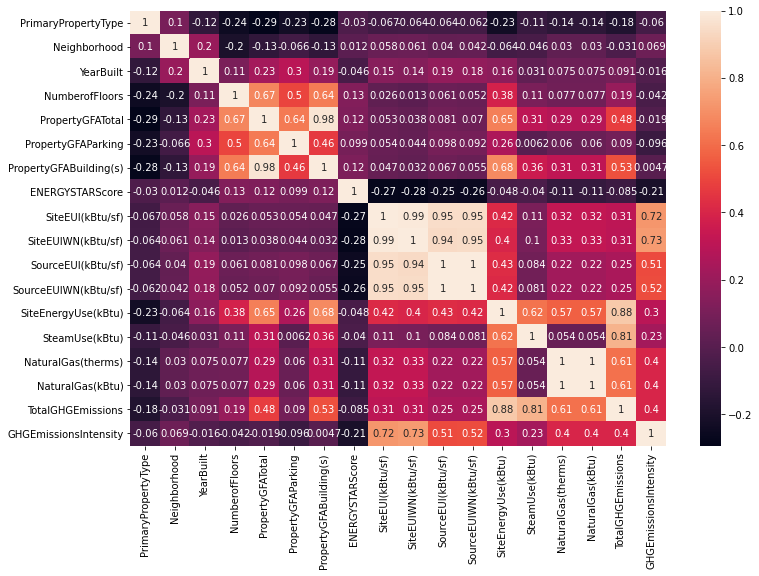

In [187]:
plt.figure(figsize=(12,8))
sns.heatmap(df3.corr(), annot=True)

Transformons les colonnes contennant des valeurs catégorielles en des valeurs numeriques avec LabeleEncoder().fit_transform()

In [181]:
X_S = df3.drop(columns=['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'])
Y_S = df3['SiteEnergyUse(kBtu)']
Y_T = df3['TotalGHGEmissions']

In [190]:
from sklearn.model_selection import train_test_split

In [191]:
x_train_Site, x_test_Site, y_train_site, y_test_site = train_test_split(X_S, Y_S, test_size = .2)

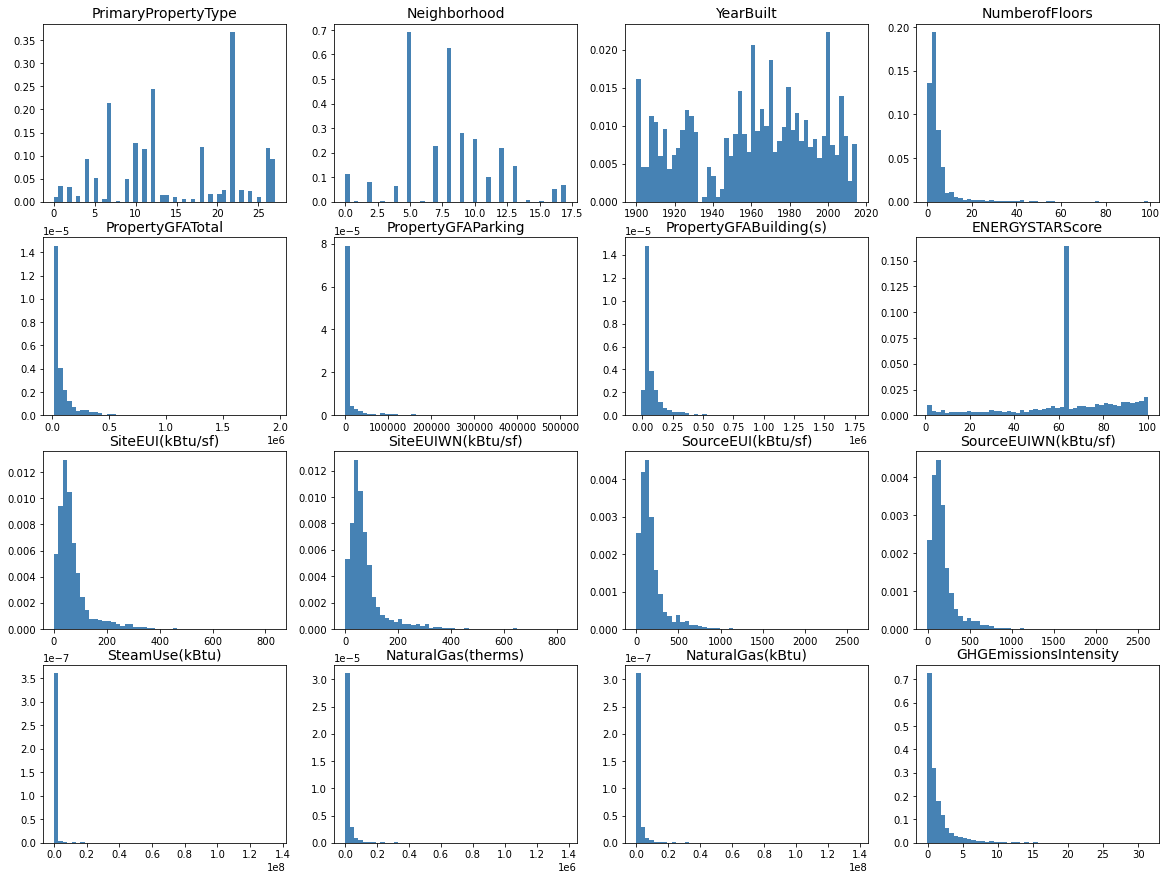

In [203]:
#On peut maintenant afficher un histogramme pour chacune de nos variables :

fig = plt.figure(figsize=(20, 19))
for feat_idx in range(X_S.values.shape[1]):
    ax = fig.add_subplot(5,4, (feat_idx+1))
    h = ax.hist(X_S.values[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(X_S.columns[feat_idx], fontsize=14)

On remarque en particulier que ces variables prennent des valeurs dans des ensembles différents. Par exemple, “PropertyGFAParking” varie de 0 à 200000 tandis que “NumberofFloor” varie de 0 à 100. Il va donc nous falloir standardiser les données pour que la première ne domine pas complètement la deuxième.

In [205]:
from sklearn.preprocessing import StandardScaler

In [206]:
scaler = StandardScaler()
scaler.fit(x_train_Site)
scaler.fit(x_test_Site)

StandardScaler()

In [ ]:
x_train_Site, x_test_Site, y_train_site, y_test_site

In [207]:
from sklearn.linear_model import LinearRegression
Regresseur = LinearRegression()

In [208]:
Regresseur.fit(x_train_Site, y_train_site)
y_pred1 = Regresseur.predict(x_test_Site)

In [210]:
from sklearn.metrics import r2_score, mean_squared_error

In [211]:
print('R2_Score : ', r2_score(y_test_site, y_pred1).round(4)*100, '%')

# un bon modele doit avoir un RMSE < 180
print("\nRMSE : {:.2f}".format(np.sqrt(mean_squared_error(y_test_site, y_pred1) )))


R2_Score :  95.04 %

RMSE : 3636959.49


## XGBOOST

In [212]:
import xgboost as xgb
#x_train_Site, x_test_Site, y_train_site, y_test_site

In [213]:
xg_reg1 = xgb.XGBRegressor(objective ='reg:linear',
                          colsample_bytree = 0.3,
                          learning_rate = 0.1,
                          max_depth = 10,
                          alpha = 10,
                          n_estimators = 200)

In [214]:
xg_reg1.fit(x_train_Site, y_train_site)

preds1 = xg_reg1.predict(x_test_Site)

[16:40:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/objective/regression_obj.cu:171: reg:linear is now deprecated in favor of reg:squarederror.


In [215]:
rmse = np.sqrt(mean_squared_error(y_test_site, preds1))
print("RMSE: %f" % (rmse))
print('R2_score : ', r2_score(y_test_site, preds1).round(4)*100, '%')

RMSE: 2262117.779270
R2_score :  98.08 %


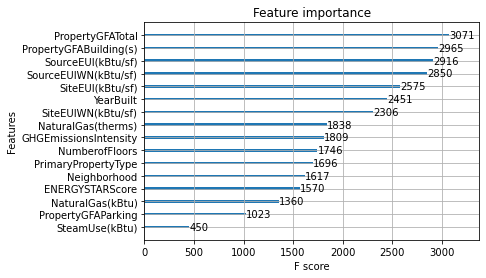

In [216]:
xgb.plot_importance(xg_reg1)
plt.rcParams['figure.figsize'] = [15, 15]
plt.show()

# SVM

In [ ]:
from sklearn import svm

# On a un probleme de Regression on fait donc appel à SVR au lieu de SVC
SVMRegresseur = svm.SVR()


In [ ]:
# Entraîner la SVM sur le jeu d'entraînement
SVMRegresseur.fit(x_train_Site, y_train_site)

In [ ]:
# On fait une prédiction avec le x_test
pred_svm_svr = SVMRegresseur.predict(x_test_Site)

In [ ]:
#================ VERIFIONS L'EXACTITUDE =====================

# Note : score() nous donne des précision de la prédiction
print('Score de prediction : ',  str(SVMRegresseur.score(x_test_Site, y_test_site)*100)[0:5],'%')

# Note : r2_score() nous donnes aussi une precision sur la prediction
print('\nr2_score() : ',str(r2_score(y_test_site, pred_svm_svr)*100)[0:5], '%')

In [ ]:
#============= Nous allons créer un deuxieme modèle pour pouvoir les croiser ============
regressor = svm.SVR(kernel='rbf') # la valeur designe le noyau gaussien
regressor.fit(x_train_Site, y_train_site)
pred_gauss = regressor.predict(x_test_Site)

In [ ]:
#================ VERIFIONS L'EXACTITUDE =====================

# Note : score() nous donne des précision de la prédiction
print('Score de prediction : ',  str(regressor.score(x_test_Site, y_test_site)*100)[0:5],'%')

# Note : r2_score() nous donnes aussi une precision sur la prediction
print('\nr2_score() : ',str(r2_score(y_test_site, pred_gauss)*100)[0:5], '%')

In [ ]:
# choisir 6 valeurs pour C, entre 1e-2 et 1e3
C_range = np.logspace(-2, 3, 6)

# choisir 4 valeurs pour gamma, entre 1e-2 et 10
gamma_range = np.logspace(-2, 1, 4)

# grille de paramètres
param_grid = {'C': C_range, 'gamma': gamma_range}

# critère de sélection du meilleur modèle
score = 'neg_mean_squared_error'

# initialiser une recherche sur grille
grid = GridSearchCV(svm.SVR(kernel='rbf'), 
                                    param_grid, 
                                    cv=5, # 5 folds de validation croisée  
                                    scoring=score
                   )

# faire tourner la recherche sur grille
grid.fit(x_train_Site, y_train_site)

# afficher les paramètres optimaux
print("les paramètres optimaux sont : {} avec un score de : {:.2f}".format(grid.best_params_, grid.best_score_))